In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-campus/click_stream.csv
/kaggle/input/fashion-campus/product.csv
/kaggle/input/fashion-campus/customer.csv
/kaggle/input/fashion-campus/transactions.csv


In [2]:
pd.set_option('display.max_columns', 10000)

# Read data

In [3]:
click_stream = pd.read_csv('../input/fashion-campus/click_stream.csv')
customers = pd.read_csv('../input/fashion-campus/customer.csv')
products = pd.read_csv('../input/fashion-campus/product.csv', on_bad_lines='skip')
transactions = pd.read_csv('../input/fashion-campus/transactions.csv')

# Labeling

In [4]:
#Let's filter data who mades success transaction
transactions_success = transactions[transactions['payment_status'] == 'Success']

#Remove qoutes in in product_metadata
import ast

transactions_success['product_metadata'] = transactions_success['product_metadata'].apply(ast.literal_eval)
transactions_success[['product_metadata']]

#Remove list in each row in product_metadata
transactions_success = transactions_success.explode('product_metadata')

#Crack and create new columns
transactions_success1 = pd.concat([transactions_success.drop(['product_metadata'], axis=1), transactions_success['product_metadata'].apply(pd.Series)], axis=1)
transactions_success1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852578,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,-6.286732,106.902229,287688,42915,1,277688
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [5]:
#Let's merge table to picture better understanding
customers_trans = customers.merge(transactions_success1, on = 'customer_id', how = 'left')

#Convert object type in created_at columns to datetime with format year-month
customers_trans['created_at'] = pd.to_datetime(customers_trans['created_at'])
customers_trans['created_at'] = customers_trans['created_at'].dt.strftime('%Y-%m')

# There 49758 customers does not have transaction, so I ignore them.
customers_trans = customers_trans[~customers_trans['booking_id'].isnull()]

#There customers do not use voucher, let's create new columns 
customers_trans['use_promo'] = customers_trans['promo_amount'].apply(lambda x: 1 if x >= 1 else 0)

#Display the table
customers_trans

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,use_promo
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,18015.0,1.0,305982.0,1
3,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,LinkAja,Success,2853.0,WEEKENDSERU,15000.0,2020-08-26T05:14:04.908999Z,0.621070,111.101844,844751.0,2401.0,2.0,263311.0,1
4,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-08,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,LinkAja,Success,0.0,NaN,10000.0,2020-09-04T05:49:01.977704Z,-6.281795,106.890417,391341.0,12449.0,1.0,381341.0,0
5,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,LinkAja,Success,0.0,NaN,0.0,2020-09-14T11:26:20.142928Z,-8.631607,116.428436,154220.0,25820.0,1.0,154220.0,0
6,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,2020-09,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Debit Card,Success,0.0,NaN,10000.0,2020-09-19T22:38:44.292440Z,0.825219,123.396780,412502.0,25157.0,1.0,247557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250788,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2021-10,6b4f439a-f515-44d3-9377-936514a3d116,6f9a4b7c-c028-464d-a0ee-7efab3e83f65,Credit Card,Success,0.0,NaN,10000.0,2021-10-24T08:18:20.393551Z,-7.179850,110.039105,311938.0,48507.0,2.0,150969.0,0
1250789,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-01,65367fff-1522-4c80-a0f7-1306676bd947,4bb58af9-b2df-4c48-bcb7-d68749625cee,Credit Card,Success,4532.0,WEEKENDSERU,10000.0,2022-01-26T01:41:11.712735Z,-6.286999,106.838482,110483.0,42935.0,1.0,105015.0,1
1250790,40573,Yani,Usada,f5a2ab29-481d-49e6-960e-cb864ee1ed5a,f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...,F,1987-09-10,Android,b6bc29e0-5a22-47af-b31e-0972aafd4cab,Android 3.2.6,-6.524369,106.283232,Banten,Indonesia,2021-07-17,2022-03,7df40e00-5e2c-40c5-99f

In [6]:
#Suggest: 1 user can two device
#Let's grouping table based on customer_id and create_att and find out total transaction customer made each month
customers_trans1 = customers_trans.groupby(['customer_id', 'created_at', 'gender', 'device_type', 'birthdate'], as_index = True).agg({'booking_id':'count', 'use_promo':'sum', 
                                                                                                                                      'quantity':'sum', 'total_amount':'sum'}).reset_index()

#Convert object type in created_at columns to datetime, again.
customers_trans1['created_at'] = pd.to_datetime(customers_trans1['created_at'])

#Rename column name booking_id to total_transaction for better understanding
customers_trans1.rename(columns = {'booking_id':'total_transaction', 'quantity':'quantity_item'}, inplace = True)
customers_trans1.sort_values(['customer_id', 'created_at'], inplace = True)
customers_trans1

,customer_id,created_at,gender,device_type,birthdate,total_transaction,use_promo,quantity_item,total_amount
0,3,2018-08-01,M,Android,1986-07-12,1,1,5.0,826597.0
1,3,2018-09-01,M,Android,1986-07-12,1,0,1.0,163784.0
2,3,2018-10-01,M,Android,1986-07-12,1,1,1.0,124932.0
3,3,2018-11-01,M,Android,1986-07-12,1,1,1.0,247902.0
4,3,2018-12-01,M,Android,1986-07-12,1,1,1.0,181237.0
...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07-01,F,Android,2014-05-21,2,0,2.0,1068674.0
565537,99998,2021-01-01,F,Android,2014-05-21,1,1,1.0,366178.0
565538,99998,2021-07-01,F,Android,2014-05-21,1,0,2.0,485330.0
565539,99998,2022-01-01,F,Android,2014-05-21,16,16,22.0,67558976.0


In [7]:
#Labeling Process Churn: If row and row+1 has same customer_id so subtract row i+1 - row and so on divide with timedelta to remove format default timedelta in created_at column rows, if otherwise subtract row i - row i and so on.
a = []
for i in range(customers_trans1.shape[0] - 1) :
    if customers_trans1.loc[i, 'customer_id'] == customers_trans1.loc[i+1, 'customer_id'] :
        a.append((customers_trans1.loc[i+1,'created_at'] - customers_trans1.loc[i,'created_at'])/np.timedelta64(1,'M'))
    else :
        a.append((customers_trans1.loc[i, 'created_at'] - customers_trans1.loc[i,'created_at'])/np.timedelta64(1,'M'))

In [8]:
#Let's a's list transformation to dataframe
diff = pd.DataFrame(a, columns = ["diff"])
diff = round(diff)

In [9]:
#Let's unite table between customers_trans1 and diff
customers_trans1 = pd.concat([customers_trans1, diff], axis=1)
customers_trans1

,customer_id,created_at,gender,device_type,birthdate,total_transaction,use_promo,quantity_item,total_amount,diff
0,3,2018-08-01,M,Android,1986-07-12,1,1,5.0,826597.0,1.0
1,3,2018-09-01,M,Android,1986-07-12,1,0,1.0,163784.0,1.0
2,3,2018-10-01,M,Android,1986-07-12,1,1,1.0,124932.0,1.0
3,3,2018-11-01,M,Android,1986-07-12,1,1,1.0,247902.0,1.0
4,3,2018-12-01,M,Android,1986-07-12,1,1,1.0,181237.0,2.0
...,...,...,...,...,...,...,...,...,...,...
565536,99998,2020-07-01,F,Android,2014-05-21,2,0,2.0,1068674.0,6.0
565537,99998,2021-01-01,F,Android,2014-05-21,1,1,1.0,366178.0,6.0
565538,99998,2021-07-01,F,Android,2014-05-21,1,0,2.0,485330.0,6.0
565539,99998,2022-01-01,F,Android,2014-05-21,16,16,22.0,67558976.0,0.0


In [10]:
#There a customer in last row who made once transaction let's fill value with 0
customers_trans1['diff'].fillna(0, inplace = True)

In [11]:
#Churn method. Customer nonchurn: 0 and churn: 1
def labelling_churn(df) : 
    if df["diff"] == 1 : 
        return 0
    else :
        return 1

In [12]:
#Apply method labelling_churn
customers_trans1["label_churn"] = customers_trans1.apply(labelling_churn, axis = 1) 

In [13]:
customers_churn = customers_trans1[['customer_id', 'label_churn']]
customers_churn #Suggestion exclude bulan terakhir pembelian

,customer_id,label_churn
0,3,0
1,3,0
2,3,0
3,3,0
4,3,1
...,...,...
565536,99998,1
565537,99998,1
565538,99998,1
565539,99998,1


In [14]:
customers_churn['label_churn'].value_counts(normalize = True)

0    0.565017
1    0.434983
Name: label_churn, dtype: float64

# Feature Engineering and Feature Selection

## 1. total_transaction columns

In [112]:
customers_trans1.columns

Index(['customer_id', 'created_at', 'gender', 'device_type', 'birthdate',
       'total_transaction', 'use_promo', 'quantity_item', 'total_amount',
       'diff', 'label_churn'],
      dtype='object')

In [113]:
asess_1 = pd.crosstab(customers_trans1["gender"], customers_trans1["label_churn"], margins=True, margins_name="Total")
asess_1

label_churn,0,1,Total
gender,,,
F,202832,156995,359827
M,116708,89006,205714
Total,319540,246001,565541


In [114]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

    
asess_1["%nonevent"] = asess_1.apply(nonevent, axis = 1)
asess_1["%event"] = asess_1.apply(event, axis = 1)

In [115]:
asess_1["WoE"] = np.log(asess_1["%event"]/asess_1["%nonevent"])
asess_1["IV"] = asess_1["WoE"]*(asess_1["%event"] - asess_1["%nonevent"])


asess_1["IV"].sum() # Useless Predictor

5.072938766770576e-05

## 2. device_type columns

In [116]:
asess_2 = pd.crosstab(customers_trans1["device_type"], customers_trans1["label_churn"], margins=True, margins_name="Total")
asess_2

label_churn,0,1,Total
device_type,,,
Android,245312,189091,434403
iOS,74228,56910,131138
Total,319540,246001,565541


In [117]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

    
asess_2["%nonevent"] = asess_2.apply(nonevent, axis = 1)
asess_2["%event"] = asess_2.apply(event, axis = 1)

In [118]:
asess_2["WoE"] = np.log(asess_2["%event"]/asess_2["%nonevent"])
asess_2["IV"] = asess_2["WoE"]*(asess_2["%event"] - asess_2["%nonevent"])


asess_2["IV"].sum() # Useless Predictor

5.131169128878947e-06

## 3. birthdate columns: generation, productive/nonproductive, remaja-tua

In [119]:
customers_trans3 = customers_trans1[['label_churn', 'birthdate']]

customers_trans3['birthdate'] = pd.to_datetime(customers_trans3['birthdate'])

#Last transaction in 2022, so we are assusme the current time is 2022
customers_trans3['age'] = 2022 -  customers_trans3['birthdate'].dt.year

customers_trans3['birthdate_year']= customers_trans3['birthdate'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [218]:
customers_trans3['age'].describe()

count    565541.000000
mean         26.445812
std           7.301839
min           6.000000
25%          21.000000
50%          26.000000
75%          31.000000
max          68.000000
Name: age, dtype: float64

In [120]:
def label_generation(x):
    if 15 <= x <= 64:
        return 'Productive'
    else:
        return 'Non-productives'

customers_trans3['label_generation'] = customers_trans3['age'].apply(label_generation)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [121]:
asess_3 = pd.crosstab(customers_trans3["label_generation"], customers_trans3["label_churn"], margins=True, margins_name="Total")
asess_3

label_churn,0,1,Total
label_generation,,,
Non-productives,9912,6943,16855
Productive,309628,239058,548686
Total,319540,246001,565541


In [122]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_3["%nonevent"] = asess_3.apply(nonevent, axis = 1)
asess_3["%event"] = asess_3.apply(event, axis = 1)

In [123]:
asess_3["WoE"] = np.log(asess_3["%event"]/asess_3["%nonevent"])
asess_3["IV"] = asess_3["WoE"]*(asess_3["%event"] - asess_3["%nonevent"])


asess_3["IV"].sum() # Weak Predictor

0.0002721941561807701

## 4. total_transaction

In [16]:
customers_trans4 = customers_trans1[['label_churn', 'total_transaction']]
customers_trans4

,label_churn,total_transaction
0,0,1
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
565536,1,2
565537,1,1
565538,1,1
565539,1,16


In [17]:
customers_trans4['total_transaction'].describe()

count    565541.000000
mean          2.123692
std           2.463846
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         113.000000
Name: total_transaction, dtype: float64

In [18]:
def label_total_transaction(x):
    if x <= 2:
        return 'standard'
    else:
        return 'high'

customers_trans4['label_total_transaction'] = customers_trans4['total_transaction'].apply(label_total_transaction)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
asess_4 = pd.crosstab(customers_trans4["label_total_transaction"], customers_trans4["label_churn"], margins=True, margins_name="Total")
asess_4

label_churn,0,1,Total
label_total_transaction,,,
high,96010,25931,121941
standard,223530,220070,443600
Total,319540,246001,565541


In [20]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_4["%nonevent"] = asess_4.apply(nonevent, axis = 1)
asess_4["%event"] = asess_4.apply(event, axis = 1)

In [21]:
asess_4["WoE"] = np.log(asess_4["%event"]/asess_4["%nonevent"])
asess_4["IV"] = asess_4["WoE"]*(asess_4["%event"] - asess_4["%nonevent"])


asess_4["IV"].sum() # Medium Predictor

0.2522841638926472

## 5. quantity_item Column

In [42]:
customers_trans5 = customers_trans1[['label_churn', 'quantity_item']]
customers_trans5

,label_churn,quantity_item
0,0,5.0
1,0,1.0
2,0,1.0
3,0,1.0
4,1,1.0
...,...,...
565536,1,2.0
565537,1,1.0
565538,1,2.0
565539,1,22.0


In [43]:
customers_trans5['quantity_item'].describe()

count    565541.000000
mean          3.134006
std           4.321139
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         180.000000
Name: quantity_item, dtype: float64

In [44]:
def label_quantity_item(x):
    if x == 1:
        return 'little'
    elif x <= 4:
        return 'standard'
    else:
        return 'high'

customers_trans5['label_quantity_item'] = customers_trans5['quantity_item'].apply(label_quantity_item)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [45]:
asess_5 = pd.crosstab(customers_trans5["label_quantity_item"], customers_trans5["label_churn"], margins=True, margins_name="Total")
asess_5

label_churn,0,1,Total
label_quantity_item,,,
high,76471,27494,103965
little,124213,163859,288072
standard,118856,54648,173504
Total,319540,246001,565541


In [46]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_5["%nonevent"] = asess_5.apply(nonevent, axis = 1)
asess_5["%event"] = asess_5.apply(event, axis = 1)

In [47]:
asess_5["WoE"] = np.log(asess_5["%event"]/asess_5["%nonevent"])
asess_5["IV"] = asess_5["WoE"]*(asess_5["%event"] - asess_5["%nonevent"])


asess_5["IV"].sum() #Strong Predictor

0.3237171642970971

## 6. total_amount Column

In [22]:
customers_trans6 = customers_trans1[['label_churn', 'total_amount']]
customers_trans6

,label_churn,total_amount
0,0,826597.0
1,0,163784.0
2,0,124932.0
3,0,247902.0
4,1,181237.0
...,...,...
565536,1,1068674.0
565537,1,366178.0
565538,1,485330.0
565539,1,67558976.0


In [23]:
customers_trans6['total_amount'].describe()

count    5.655410e+05
mean     2.512921e+06
std      1.146663e+07
min      1.520300e+04
25%      2.352600e+05
50%      4.054560e+05
75%      1.142561e+06
max      8.931705e+08
Name: total_amount, dtype: float64

In [24]:
def label_total_amount(x):
    if x <= 240000:
        return 'little'
    elif x <= 400000:
        return 'standard'
    else:
        return 'high'

customers_trans6['label_total_amount'] = customers_trans6['total_amount'].apply(label_total_amount)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [25]:
asess_6 = pd.crosstab(customers_trans6["label_total_amount"], customers_trans6["label_churn"], margins=True, margins_name="Total")
asess_6

label_churn,0,1,Total
label_total_amount,,,
high,192940,92686,285626
little,63855,83056,146911
standard,62745,70259,133004
Total,319540,246001,565541


In [26]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_6["%nonevent"] = asess_6.apply(nonevent, axis = 1)
asess_6["%event"] = asess_6.apply(event, axis = 1)

In [27]:
asess_6["WoE"] = np.log(asess_6["%event"]/asess_6["%nonevent"])
asess_6["IV"] = asess_6["WoE"]*(asess_6["%event"] - asess_6["%nonevent"])


asess_6["IV"].sum() # Medium Predictor

0.21277264595029943

## 7. use promo Column #Catatan

In [28]:
customers_trans7 = customers_trans1[['label_churn', 'use_promo']]
customers_trans7

,label_churn,use_promo
0,0,1
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
565536,1,0
565537,1,1
565538,1,0
565539,1,16


In [29]:
def label_use_promo(x):
    if x <= 1:
        return 'barely'
    elif x <= 4:
        return 'regular'
    else:
        return 'frequent'

customers_trans7['label_use_promo'] = customers_trans7['use_promo'].apply(label_use_promo)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [30]:
asess_7 = pd.crosstab(customers_trans7["label_use_promo"], customers_trans7["label_churn"], margins=True, margins_name="Total")
asess_7

label_churn,0,1,Total
label_use_promo,,,
barely,262108,227445,489553
frequent,11119,4247,15366
regular,46313,14309,60622
Total,319540,246001,565541


In [31]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_7["%nonevent"] = asess_7.apply(nonevent, axis = 1)
asess_7["%event"] = asess_7.apply(event, axis = 1)

In [32]:
asess_7["WoE"] = np.log(asess_7["%event"]/asess_7["%nonevent"])
asess_7["IV"] = asess_7["WoE"]*(asess_7["%event"] - asess_7["%nonevent"])


asess_7["IV"].sum() # Medium Predictor

0.10399345517193605

## 8. freq_add_to_cart column

In [32]:
click_stream['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [33]:
#Convert object type in created_at columns to datetime with format year-month
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
click_stream['event_time'] = click_stream['event_time'].dt.strftime('%Y-%m')

#Sorting table to get value in ADD_TO_CART on event_name columns
click_stream_cart = click_stream[click_stream['event_name'] == 'ADD_TO_CART']
click_stream_cart.sort_values(['session_id', 'event_name'], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [34]:
#Let's grouping to create add_to_cart_freq column
click_stream_cart1 = click_stream_cart.groupby(['session_id', 'event_time'], as_index= False).agg({'event_name':'count'})
click_stream_cart1.rename(columns = {'event_name':'add_to_cart_freq'}, inplace = True)
click_stream_cart1

,session_id,event_time,add_to_cart_freq
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08,1
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-03,1
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,1
4,0000649b-9514-4600-979b-42166a798996,2020-07,3
...,...,...,...
932666,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,2021-10,2
932667,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,4
932668,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,1
932669,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,5


In [35]:
#Let's merge to get better understanding between click_stream_cart1 and customers_trans table
click_stream_cart2 = click_stream_cart1.merge(customers_trans[['session_id', 'customer_id']], on = 'session_id', how = 'left')

#Let's ignore null value in customer_id columns because their customer do not have transaction at all
click_stream_cart2 = click_stream_cart2[~click_stream_cart2['customer_id'].isnull()]
click_stream_cart2

,session_id,event_time,add_to_cart_freq,customer_id
0,00001f29-3ede-4445-95f0-0178934e32ba,2019-05,1,74433.0
1,00003eca-954b-4150-aee1-63fc62f395cf,2019-08,1,43805.0
2,0000425b-ddc8-4459-a240-6ba814dac132,2019-03,1,90074.0
3,00005746-17ec-449c-9c5c-699a3ea9304a,2022-03,1,25255.0
4,0000649b-9514-4600-979b-42166a798996,2020-07,3,16868.0
...,...,...,...,...
1374201,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,4,15566.0
1374202,ffffd3d9-79db-459e-a427-388204a7aac7,2021-11,4,15566.0
1374203,ffffdf8e-dea1-42bc-9839-7662675c0d38,2020-11,1,65771.0
1374204,fffff7cf-2a18-4303-9c12-aa836ae3b543,2021-02,5,2353.0


In [36]:
#Let's grouping again for get how many add to cart frequen each month.
click_stream_cart3 = click_stream_cart2.groupby(['customer_id', 'event_time'], as_index = False).agg({'add_to_cart_freq':'sum'})
click_stream_cart3.rename(columns = {'event_time':'created_at'}, inplace = True)
click_stream_cart3['created_at'] = pd.to_datetime(click_stream_cart3['created_at'])
click_stream_cart3

,customer_id,created_at,add_to_cart_freq
0,3.0,2018-08-01,2
1,3.0,2018-09-01,3
2,3.0,2018-10-01,3
3,3.0,2018-11-01,3
4,3.0,2018-12-01,4
...,...,...,...
606139,99998.0,2021-01-01,1
606140,99998.0,2021-07-01,3
606141,99998.0,2021-12-01,160
606142,99998.0,2022-01-01,128


In [37]:
#Let's merge to get better understanding between customers_trans8 and customers_trans1 table
customers_trans8 = customers_trans1[['customer_id', 'created_at', 'label_churn']].merge(click_stream_cart3, on = ['customer_id', 'created_at'], how = 'left')

#There customers have null value in add_to_cart_freq, I fill it with 0.
customers_trans8['add_to_cart_freq'].fillna(0, inplace = True)
customers_trans8

,customer_id,created_at,label_churn,add_to_cart_freq
0,3,2018-08-01,0,2.0
1,3,2018-09-01,0,3.0
2,3,2018-10-01,0,3.0
3,3,2018-11-01,0,3.0
4,3,2018-12-01,1,4.0
...,...,...,...,...
565536,99998,2020-07-01,1,0.0
565537,99998,2021-01-01,1,1.0
565538,99998,2021-07-01,1,3.0
565539,99998,2022-01-01,1,128.0


In [38]:
def label_add_to_cart_freq(x):
    if x <= 2:
        return 'barely'
    elif x <= 4:
        return 'standard'
    else:
        return 'frequent'

customers_trans8['label_add_to_cart_freq'] = customers_trans8['add_to_cart_freq'].apply(label_add_to_cart_freq)

In [39]:
asess_8 = pd.crosstab(customers_trans8["label_add_to_cart_freq"], customers_trans8["label_churn"], margins=True, margins_name="Total")
asess_8

label_churn,0,1,Total
label_add_to_cart_freq,,,
barely,173199,171129,344328
frequent,97576,39618,137194
standard,48765,35254,84019
Total,319540,246001,565541


In [40]:
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_8["%nonevent"] = asess_8.apply(nonevent, axis = 1)
asess_8["%event"] = asess_8.apply(event, axis = 1)

In [41]:
asess_8["WoE"] = np.log(asess_8["%event"]/asess_8["%nonevent"])
asess_8["IV"] = asess_8["WoE"]*(asess_8["%event"] - asess_8["%nonevent"])


asess_8["IV"].sum() # Medium Predictor

0.13124952693517206

## 9. created_at column

In [15]:
#Let's retrive column in table we just need
customers_trans9 = customers_trans1[['label_churn' ,'created_at']]

#Convert object type in created_at columns to datetime with format month
customers_trans9['created_at'] = customers_trans9['created_at'].dt.strftime('%m')

#Convert object type in created_at columns to int for filtering in a function
customers_trans9['created_at'] = customers_trans9['created_at'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#Labeling Function
def label_time_transaction(x):
    if x <= 3:
        return 'q1'
    elif x <= 6:
        return 'q2'
    elif x <= 9:
        return 'q3'
    else:
        return 'q4'

customers_trans9['label_time_transaction'] = customers_trans9['created_at'].apply(label_time_transaction)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


In [17]:
#Let's create crosstab to better understanding betwween two column
asess_9 = pd.crosstab(customers_trans9["label_time_transaction"], customers_trans9["label_churn"], margins=True, margins_name="Total")
asess_9

label_churn,0,1,Total
label_time_transaction,,,
q1,83591,61764,145355
q2,90565,63675,154240
q3,68399,64232,132631
q4,76985,56330,133315
Total,319540,246001,565541


In [18]:
#The function for calculate %nonevent & %event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_9["%nonevent"] = asess_9.apply(nonevent, axis = 1)
asess_9["%event"] = asess_9.apply(event, axis = 1)

In [20]:
#The formula for calculate WoE (Weight of Evidence) & IV (Information Value)
asess_9["WoE"] = np.log(asess_9["%event"]/asess_9["%nonevent"])
asess_9["IV"] = asess_9["WoE"]*(asess_9["%event"] - asess_9["%nonevent"])


asess_9["IV"].sum() # Useless Predictor

0.012618086909194772

In [ ]:
#Template

def label_generation(x):
    if 15 <= x <= 64:
        return 'Productive'
    else:
        return 'Non-productives'

customers_trans3['label_generation'] = customers_trans3['age'].apply(label_generation)

asess_2 = pd.crosstab(customers_trans1["device_type"], customers_trans1["label_churn"], margins=True, margins_name="Total")
asess_2

def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/246001)

asess_3["%nonevent"] = asess_3.apply(nonevent, axis = 1)
asess_3["%event"] = asess_3.apply(event, axis = 1)

asess_2["WoE"] = np.log(asess_2["%event"]/asess_2["%nonevent"])
asess_2["IV"] = asess_2["WoE"]*(asess_2["%event"] - asess_2["%nonevent"])


asess_2["IV"].sum() # Suspicious for Predictor

## Conclusion:
Based on feature selection there 4 medium predictors and a strong predictor. So, We will use in our modelling.


# Final Feature

In [48]:
final_feature =  pd.concat([customers_churn['label_churn'], customers_trans4['label_total_transaction'], customers_trans6['label_total_amount'], 
           customers_trans7['label_use_promo'], customers_trans8['label_add_to_cart_freq'], customers_trans5['label_quantity_item']], axis = 1)
final_feature

,label_churn,label_total_transaction,label_total_amount,label_use_promo,label_add_to_cart_freq,label_quantity_item
0,0,standard,high,barely,barely,high
1,0,standard,little,barely,standard,little
2,0,standard,little,barely,standard,little
3,0,standard,standard,barely,standard,little
4,1,standard,little,barely,standard,little
...,...,...,...,...,...,...
565536,1,standard,high,barely,barely,standard
565537,1,standard,standard,barely,barely,little
565538,1,standard,high,barely,standard,standard
565539,1,high,high,frequent,frequent,high


In [49]:
#Let's convert value in column into categorical numeric
final_feature['label_total_transaction'].replace({'standard':1, 'high':2}, inplace = True)
final_feature['label_total_amount'].replace({'little':1, 'standard':2, 'high':3}, inplace = True)
final_feature['label_use_promo'].replace({'barely':1, 'regular':2, 'frequent':3}, inplace = True)
final_feature['label_add_to_cart_freq'].replace({'barely':1, 'standard':2, 'frequent':3}, inplace = True)
final_feature['label_quantity_item'].replace({'little':1, 'standard':2, 'high':3}, inplace = True)

# Split The Data

In [50]:
#Split column, save it to X and Y
X = final_feature.loc[:, final_feature.columns != 'label_churn']
y = final_feature[['label_churn']]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Modelling

## 1. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Fit the classifier
clf_lr.fit(X_train, y_train)

# Compute accuracy
print(clf_lr.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6349351361227846


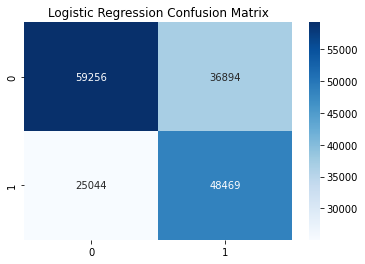

In [53]:
# Predict the labels of the test set
y_pred = clf_lr.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

#Display Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt


labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [54]:
# Print the spescificity
print(conf_matrix_lr[1,1]/(conf_matrix_lr[1,1] + conf_matrix_lr[0,1]))

0.5677986949849466


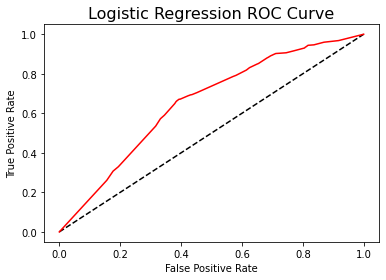

In [55]:
from sklearn.metrics import roc_curve

y_pred_prob = clf_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

## 2. Random Forest

In [56]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf_rfm = RandomForestClassifier()

# Fit to the training data
clf_rfm.fit(X_train, y_train)

# Compute accuracy
print(clf_rfm.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.635300566416956


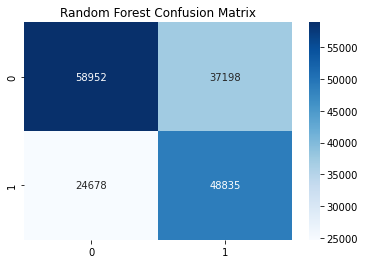

In [57]:
# Predict the labels of the test set
y_pred = clf_rfm.predict(X_test)

#Display Confusion Matrix
conf_matrix_rfm = confusion_matrix(y_test, y_pred)

labels = ['‘True Neg’','’False Pos’','’False Neg’','’True Pos’']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_rfm, annot=True, fmt='', cmap='Blues')

plt.title('Random Forest Confusion Matrix')
plt.show()

In [58]:
# Print the spescificity
print(conf_matrix_rfm[1,1]/(conf_matrix_rfm[1,1] + conf_matrix_rfm[0,1]))

0.5676310253042437


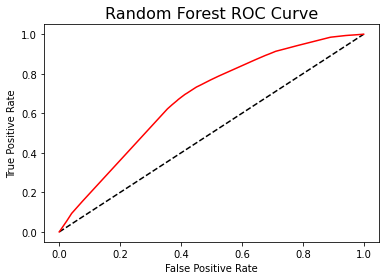

In [59]:
y_pred_prob = clf_rfm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

#### Saran Manchine Learning: Logistic, XGboost, Deep Learning